<a href="https://colab.research.google.com/github/Lucasall95/ProcessamentoIMGExec/blob/main/C%C3%B3pia_de_PI_Tarefa_6_(Quinta_Semana_(ERE)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.
4. Envie um áudio curto ao professor explicando cada solução criada por você.

#1. Histograma de Cores

Nos vídeos abaixo, eu discuto o tema de histograma de cores em imagens digitais.

<a href="https://www.youtube.com/watch?v=ioa_mFB_nFg"><img src="https://img.youtube.com/vi/ioa_mFB_nFg/mqdefault.jpg"/></a>

<a href="https://www.youtube.com/watch?v=83RZSK1j8Ak"><img src="https://img.youtube.com/vi/83RZSK1j8Ak/mqdefault.jpg"/></a>

Nesse exercício, quero que você selecione 2 imagens distintas entre si. Uma deve ser preto e branco e a outra colorida.

Plote (desenhe o gráfico) dos seus histogramas na tela via Python e OpenCV.

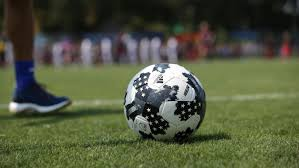

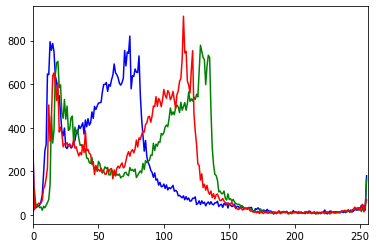

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt


def histrogramaCinza(img):
   plt.hist(img.ravel(), 256, [0, 256])
   cv2_imshow(img)
   plt.show()
   return img

def histrogramaColorido(img):
   color = ('b','g', 'r') 
   for i, col  in enumerate(color): 
        histr = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(histr,color = col)
        plt.xlim([0, 256])
   cv2_imshow(img)
   plt.show()
   return img

imgFutebol = cv2.imread("Futebol.jpg")

histrogramaColorido(imgFutebol)

cv2.waitKey()
cv2.destroyAllWindows()

#2. Equalização de histograma

Utilizando a ideia dessa página, crie um algoritmo que faça a equalização de histograma da imagem abaixo, a fim de melhorar seu contraste. 

Sugestão: <a href="https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html">siga este tutorial</a>.

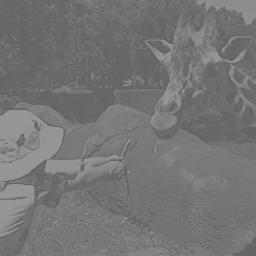

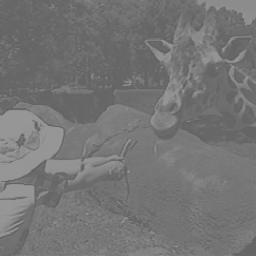

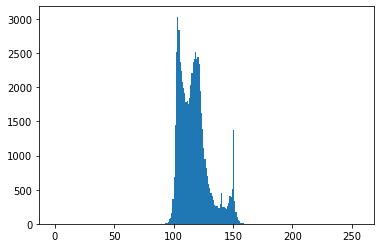

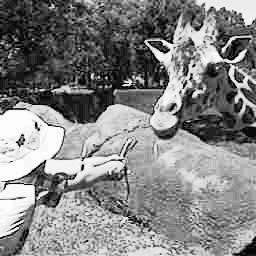

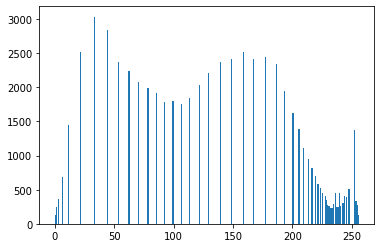

array([[113,  99,  78, ..., 236, 236, 236],
       [ 70,  70,  70, ..., 236, 236, 236],
       [ 21,  33,  53, ..., 236, 236, 236],
       ...,
       [113, 106, 106, ...,  11,  11,  11],
       [121, 106,  92, ...,  21,  21,  21],
       [121, 106,  85, ...,  33,  33,  33]], dtype=uint8)

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def histrogramaCinza(img):
   plt.hist(img.ravel(), 256, [0, 256])
   cv2_imshow(img)
   plt.show()
   return img

imgOriginal = cv2.imread("Equal.jpg", 0)
imgEqual = cv2.equalizeHist(imgOriginal)
histrogramaCinza(imgOriginal)
histrogramaCinza(imgEqual)


#3. Meu primeiro buscador de imagens!

[Um jeito muito simples de verificar se uma imagem é igual a outra  é por meio de comparação entre histogramas](https://docs.opencv.org/3.4/d8/dc8/tutorial_histogram_comparison.html). 

Dito isso, você deverá fazer o seguinte:

* Crie uma pasta contendo ao menos 5 imagens, das quais duas precisam ser muito similares em seu conteúdo visual (mas não idênticas). Para facilitar, vamos chamar as imagens muito parecidas de S1 e S2. As imagens restantes que são diferentes, serão D1, D2 e D3.
* Faça uma função que receba as imagens S1 e compare ela com S2, D1, D2 e D3 pelo histograma. 
* Compare a distância de S1 para cada imagem considerando as métricas da Correlação, Chi-Square e Bhattacharrya. 
* Para cada imagem, some as três distâncias ao quadrado e aplique a raiz quadrada: sqrt(Corr^2 + Chi-Sq^2 + Bhatta^2)
* Retorne a imagem mais parecida com S1 (o par que tiver a menor distância)

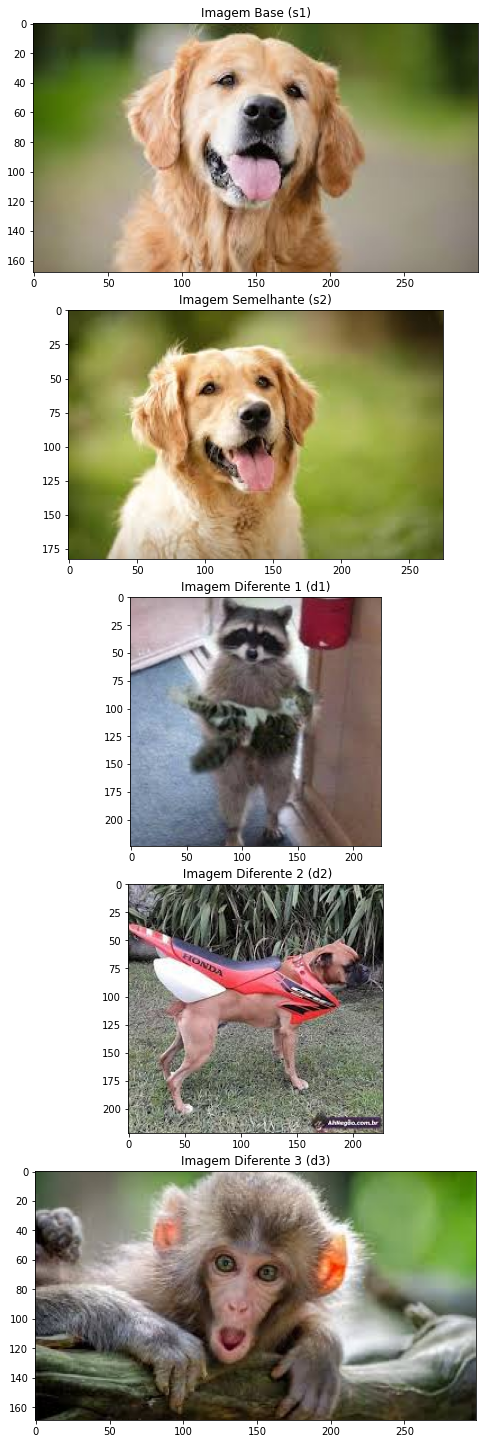


Correlação s2:  0.25041882740529414
Chi-square s2:  695.1531043913604
valorBhattacharrya s2:  0.6198903568114282

Correlação d1:  0.042903461505026656
Chi-square d1:  1127.0230890738121
valorBhattacharrya d1:  0.8081350110757337

Correlação d2:  0.008520518041235943
Chi-square d2:  4676.124139801161
valorBhattacharrya d2:  0.8234636760698953

Correlação d3:  0.36130908666459766
Chi-square d3:  4485.933824372424
valorBhattacharrya d3:  0.6195061271164687

Com uma distâcia de 695.1534258842355 a seguinte imagem é a mais similar:


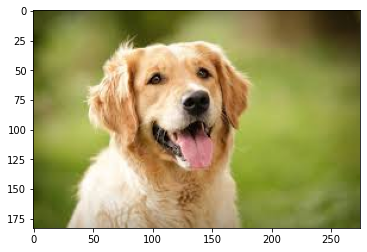

In [ ]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt

def mostraMultiplasImg(vetorImagens, vetorTitulos):
  y = int(len(vetorImagens))
  fig, axis = plt.subplots(y, 1,figsize=(20,20))
  xId, yId, titleId = 0, 0, 0
  for img in vetorImagens:
    axis[yId].set_title(vetorTitulos[titleId])
    copia = cv2.cvtColor(vetorImagens[yId], cv2.COLOR_BGR2RGB)
    axis[yId].imshow(copia)
    titleId += 1 
    yId += 1
  
  fig.tight_layout(pad=0.5)
  plt.show()

def compara(s1, s2, d1, d2, d3):
  
  hsvS1 = cv2.cvtColor(s1, cv2.COLOR_BGR2HSV)
  hsvS2 = cv2.cvtColor(s2, cv2.COLOR_BGR2HSV)
  hsvD1 = cv2.cvtColor(d1, cv2.COLOR_BGR2HSV)
  hsvD2 = cv2.cvtColor(d2, cv2.COLOR_BGR2HSV)
  hsvD3 = cv2.cvtColor(d3, cv2.COLOR_BGR2HSV)

  h_bins = 50
  s_bins = 60
  histSize = [h_bins, s_bins]
  
  h_ranges = [0, 180]
  s_ranges = [0, 256]
  ranges = h_ranges + s_ranges

  channels = [0, 1]
  
  hist_base = cv2.calcHist([hsvS1], channels, None, histSize, ranges, accumulate=False)
  cv2.normalize(hist_base, hist_base, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

  hist_s2 = cv2.calcHist([hsvS2], channels, None, histSize, ranges, accumulate=False)
  cv2.normalize(hist_s2, hist_s2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

  hist_d1 = cv2.calcHist([hsvD1], channels, None, histSize, ranges, accumulate=False)
  cv2.normalize(hist_d1, hist_d1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

  hist_d2 = cv2.calcHist([hsvD2], channels, None, histSize, ranges, accumulate=False)
  cv2.normalize(hist_d2, hist_d2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

  hist_d3 = cv2.calcHist([hsvD3], channels, None, histSize, ranges, accumulate=False)
  cv2.normalize(hist_d3, hist_d3, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

  valorCorrelacao = []
  valorCorrelacao.append(cv2.compareHist(hist_base, hist_s2, 0))
  valorCorrelacao.append(cv2.compareHist(hist_base, hist_d1, 0))
  valorCorrelacao.append(cv2.compareHist(hist_base, hist_d2, 0))
  valorCorrelacao.append(cv2.compareHist(hist_base, hist_d3, 0))
  valorChi_square = []
  valorChi_square.append(cv2.compareHist(hist_base, hist_s2, 1))
  valorChi_square.append(cv2.compareHist(hist_base, hist_d1, 1))
  valorChi_square.append(cv2.compareHist(hist_base, hist_d2, 1))
  valorChi_square.append(cv2.compareHist(hist_base, hist_d3, 1))
  valorBhattacharrya = []
  valorBhattacharrya.append(cv2.compareHist(hist_base, hist_s2, 3))
  valorBhattacharrya.append(cv2.compareHist(hist_base, hist_d1, 3))
  valorBhattacharrya.append(cv2.compareHist(hist_base, hist_d2, 3))
  valorBhattacharrya.append(cv2.compareHist(hist_base, hist_d3, 3))
  print('')
  print("Correlação s2: ", valorCorrelacao[0])
  print("Chi-square s2: ", valorChi_square[0])
  print("valorBhattacharrya s2: ", valorBhattacharrya[0])
  print('')
  print("Correlação d1: ", valorCorrelacao[1])
  print("Chi-square d1: ", valorChi_square[1])
  print("valorBhattacharrya d1: ", valorBhattacharrya[1])
  print('')
  print("Correlação d2: ", valorCorrelacao[2])
  print("Chi-square d2: ", valorChi_square[2])
  print("valorBhattacharrya d2: ", valorBhattacharrya[2])
  print('')
  print("Correlação d3: ", valorCorrelacao[3])
  print("Chi-square d3: ", valorChi_square[3])
  print("valorBhattacharrya d3: ", valorBhattacharrya[3])
  print('')
  menor = math.sqrt(valorCorrelacao[0]**2 + valorChi_square[0]**2 + valorBhattacharrya[0]**2)
  indiceMenor = 0
  
  for i in range(1,4):
    
    raiz = math.sqrt(valorCorrelacao[i]**2 + valorChi_square[i]**2 + valorBhattacharrya[i]**2)
    if(raiz < menor):
      menor = raiz
      indiceMenor = i
  if(indiceMenor == 0):
    return s2, menor
  elif(indiceMenor == 1):
    return d1, menor
  elif(indiceMenor == 2):
    return d2, menor
  elif(indiceMenor == 3):
    return d3, menor

imgS1 = cv2.imread("S1.jpg")
imgS2 = cv2.imread("S2.jpg")
imgD1 = cv2.imread("D1.jpg")
imgD2 = cv2.imread("D2.jpg")
imgD3 = cv2.imread("D3.jpg")

mostraMultiplasImg([imgS1, imgS2, imgD1, imgD2, imgD3], ['Imagem Base (s1)','Imagem Semelhante (s2)','Imagem Diferente 1 (d1)',' Imagem Diferente 2 (d2)','Imagem Diferente 3 (d3)'])
maisParecida, valor = compara(imgS1, imgS2, imgD1, imgD2, imgD3)
print('Com uma distâcia de',valor,'a seguinte imagem é a mais similar:')

imgParecida = cv2.cvtColor(maisParecida, cv2.COLOR_BGR2RGB)
plt.imshow(imgParecida)
plt.show()

#4. Vídeo da Erosão e Dilatação

Crie duas funções chamada videoErosao e videoDilatacao.

A função videoErosao() receberá uma imagem em preto e branco como a apresentada abaixo e deverá aplicar a operação de erosão sucessivamente, até ela desaparecer. Faça um vídeo que aplique essa operação aos poucos, em formato de animação.

Realize procedimento parecido para videoDilatacao(), só que fazendo o oposto com a operação de dilatação.

OBS: <a href="https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html">Esse texto deverá ajudar</a>.

E para gerar o vídeo, <a href="https://colab.research.google.com/drive/1sQAxhv5nIWDvwt82osa2x41zVtUFyx1O?usp=sharing">olhe aqui</a>.

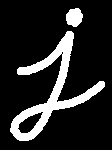

In [ ]:

import cv2
import numpy as np

def videoErosao(imagem):
    out = cv2.VideoWriter('erosao.avi', fourcc, 1, (112, 150))
    frameIntro = cv2.imread('intro1e.png')
    out.write(frameIntro)
    out.write(frameIntro)
   
    for i in range(7):
        out.write(erosion(0, i))
    frameIntro = cv2.imread('intro2e.png')
    out.write(frameIntro)
    out.write(frameIntro)
    for i in range(12):
        out.write(erosion(1, i))
    frameIntro = cv2.imread('intro3e.png')
    out.write(frameIntro)
    out.write(frameIntro)
    for i in range(9):
        out.write(erosion(2, i))
    out.release()

def videoDilatacao(imagem):
    out = cv2.VideoWriter('dilatacao.avi', fourcc, 3, (112, 150))
   
    frameIntro = cv2.imread('intro1d.png')
    out.write(frameIntro)
    out.write(frameIntro)
    out.write(frameIntro)
    out.write(frameIntro)
    out.write(frameIntro)
    out.write(frameIntro)
    out.write(frameIntro)
    out.write(frameIntro)
    
    for i in range(55):
        out.write(dilatation(0, i))
    frameIntro = cv2.imread('intro2d.png')
    out.write(frameIntro)
    out.write(frameIntro)
    out.write(frameIntro)
    out.write(frameIntro)
    out.write(frameIntro)
    out.write(frameIntro)
    out.write(frameIntro)
    out.write(frameIntro)
    for i in range(132):
        out.write(dilatation(1, i))
    frameIntro = cv2.imread('intro3d.png')
    out.write(frameIntro)
    out.write(frameIntro)
    out.write(frameIntro)
    out.write(frameIntro)
    out.write(frameIntro)
    out.write(frameIntro)
    out.write(frameIntro)
    out.write(frameIntro)
    for i in range(70):
        out.write(dilatation(2, i))
    out.release()
    
def erosion(elm, val):
    erosion_size = val
    erosion_type = 0
   
    if elm == 0:
        erosion_type = cv2.MORPH_RECT
    elif elm == 1:
        erosion_type = cv2.MORPH_CROSS
    elif elm == 2:
        erosion_type = cv2.MORPH_ELLIPSE
        
    element = cv2.getStructuringElement(erosion_type, (2*erosion_size + 1, 2*erosion_size+1), (erosion_size, erosion_size))
  
    erosion_dst = cv2.erode(src, element)
    return erosion_dst
    
def dilatation(elm, val):
    dilatation_size = val
    dilatation_type = 0
    
    if elm == 0:
        dilatation_type = cv2.MORPH_RECT
    elif elm == 1:
        dilatation_type = cv2.MORPH_CROSS
    elif elm == 2:
        dilatation_type = cv2.MORPH_ELLIPSE
    element = cv2.getStructuringElement(dilatation_type, (2*dilatation_size + 1, 2*dilatation_size+1), (dilatation_size, dilatation_size))
    
    dilatation_dst = cv2.dilate(src, element)
    return dilatation_dst
    
src = cv2.imread('J.png'

import os.path
os.path.isfile('j.mkv')
fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')

videoErosao(src)
videoDilatacao(src)
